In [1]:
import os
import sys
import time
import sklearn
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)
matplotlib 3.0.3
numpy 1.16.2
pandas 0.24.2
sklearn 0.20.3
tensorflow 2.0.0-rc0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(55000, 28, 28) (55000,)
(5000, 28, 28) (5000,)
(10000, 28, 28) (10000,)


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)


In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),   
])

for _ in range(20):
    model.add(keras.layers.Dense(100,activation="relu"))
    
model.add(keras.layers.Dense(10,activation="softmax"))

model.compile(loss = "sparse_categorical_crossentropy", # 损失函数
              optimizer = "adam",                       # 模型的求解方法
              metrics = ["accuracy"])                   # 增加 accuracy 指标

In [6]:
# 查询模型概况
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [7]:

logdir = os.path.join("dnn_callbacks")

if not os.path.exists(logdir):
    os.mkdir(logdir)
    
output_model_file = os.path.join(logdir,"fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only = True), # 保存最好的模型，默认最新
    keras.callbacks.EarlyStopping(
        min_delta= 1e-3, 
        patience=5, 
    ),
]


history = model.fit(x_train_scaled,y_train,epochs=100,
          validation_data=(x_valid_scaled,y_valid),
          callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 13s 239us/sample - loss: 0.8611 - accuracy: 0.6704 - val_loss: 0.6119 - val_accuracy: 0.7814
Epoch 2/100
55000/55000 [==============================] - 11s 196us/sample - loss: 0.6263 - accuracy: 0.7846 - val_loss: 0.5865 - val_accuracy: 0.7966
Epoch 3/100
55000/55000 [==============================] - 10s 185us/sample - loss: 0.5737 - accuracy: 0.8003 - val_loss: 0.6323 - val_accuracy: 0.7792
Epoch 4/100
55000/55000 [==============================] - 10s 185us/sample - loss: 0.5169 - accuracy: 0.8228 - val_loss: 0.4893 - val_accuracy: 0.8360
Epoch 5/100
55000/55000 [==============================] - 10s 184us/sample - loss: 0.4905 - accuracy: 0.8331 - val_loss: 0.4913 - val_accuracy: 0.8340
Epoch 6/100
55000/55000 [==============================] - 10s 184us/sample - loss: 0.4885 - accuracy: 0.8335 - val_loss: 0.4403 - val_accuracy: 0.8542
Epoch 7/100
55000/55000 [==============

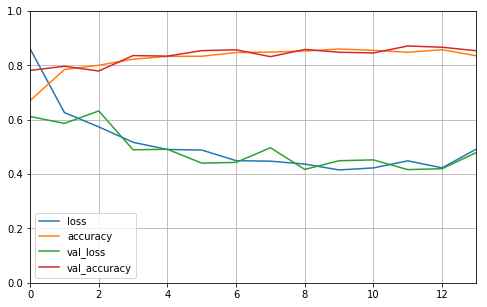

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)

In [9]:
model.evaluate(x_test_scaled,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.5076153406500816, 0.8417]

In [ ]:
# 打开tensorflow Tensorboard 
!tensorboard --logdir=callbacks

In [ ]:
# http://localhost:6006/